In [ ]:
import numpy as np
import matplotlib.pyplot as plt
                                                                    
import matplotlib.cm as cm  # colormaps
                                        
%matplotlib inline

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp

In [ ]:
# If running on lab machine execute this cell
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models, Model 
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization, Layer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [ ]:
# Load cifar-10 image dataset. Details of the CIFAR-10 dataset can be found 
(cx_train, cy_train),(cx_test, cy_test) = cifar10.load_data()
print(cx_train.shape)
print(cy_train.shape)

In [5]:
#Function to display the images
def plot_colour_images(images_to_plot, titles=None, nrows=None, ncols=6, thefigsize=(18,18), classes=10):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    if nrows is None:
        nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,:]) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None and i<classes:
            ax[i].set_title(titles[i%classes])

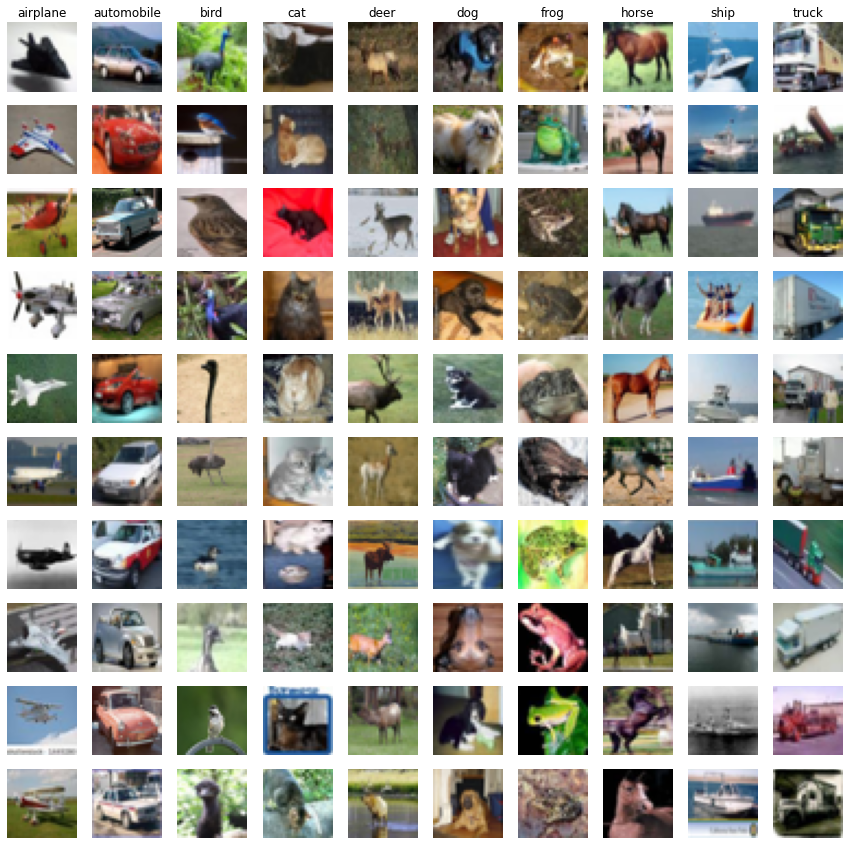

In [6]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_to_plot = None
for i in range(0, len(classes)):
    index = np.where(cy_train==i)[0]
    if i == 0:
        images_to_plot = cx_train[index[0:10],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, cx_train[index[0:10],:,:]))
images_to_plot = images_to_plot.reshape(10,10,32, 32, 3).transpose(1,0,2,3,4).reshape(100,32,32,3)
plot_colour_images(images_to_plot, nrows=10, ncols=10,thefigsize=(15,15), titles=classes)

In [7]:
#choosing classes airplane, automobile, bird and truck
index_train = []
index_test = []

for i in [0,1,2,9]:
    index_train = index_train + list(np.where(cy_train==i)[0])
    index_test = index_test + list(np.where(cy_test==i)[0])
cy_train_ss = cy_train[index_train]
cy_train_ss = np.where(cy_train_ss==9,3,cy_train_ss)
cx_train_ss = cx_train[index_train,:,:]
cy_test_ss = cy_test[index_test]
cy_test_ss = np.where(cy_test_ss==9,3,cy_test_ss)
cx_test_ss = cx_test[index_test,:,:]
print(cx_train_ss.shape, cy_train_ss.shape)
print(cx_test_ss.shape, cy_test_ss.shape)

(20000, 32, 32, 3) (20000, 1)
(4000, 32, 32, 3) (4000, 1)


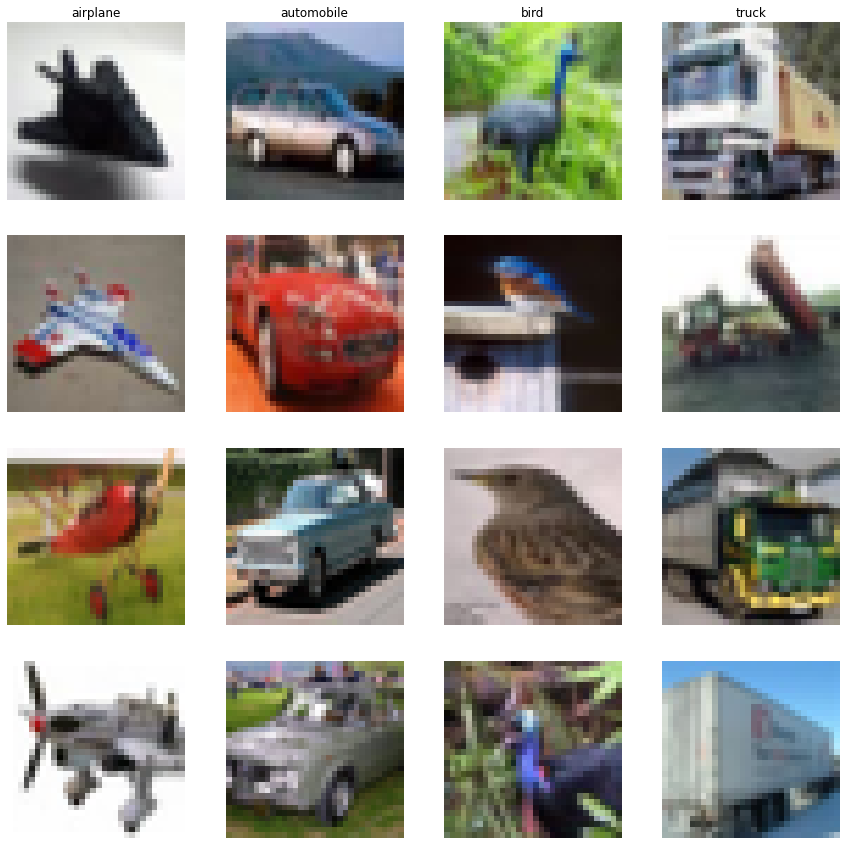

In [8]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'truck']
images_to_plot = None
for i in [0,1,2,3]:
    index = np.where(cy_train_ss==i)[0]
    if i == 0:
        images_to_plot = cx_train_ss[index[0:4],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, cx_train_ss[index[0:4],:,:]))
images_to_plot = images_to_plot.reshape(4,4,32, 32, 3).transpose(1,0,2,3,4).reshape(16,32,32,3)
plot_colour_images(images_to_plot, nrows=4, ncols=4,thefigsize=(15,15), titles=classes, classes=len(classes))

In [9]:
# to use softmax, we need to alter the class representations from integers to 'one-hot' 
cy_train_one_hot = to_categorical(cy_train_ss)
cy_test_one_hot = to_categorical(cy_test_ss)
cy_train_one_hot.shape, cy_train_one_hot.shape

((20000, 4), (20000, 4))

In [10]:
train_size = 832

In [11]:
c_size = int(train_size/4)
x_train = cx_train_ss[:c_size,:,:]
print(cy_train_ss.shape)
y_train = cy_train_ss[:c_size,:]
y_train_one_hot = cy_train_one_hot[:c_size,:]
for i in range(1,4):
    x_train = np.vstack((x_train, cx_train_ss[i*5000:(i*5000)+c_size,:,:]))
    y_train = np.vstack((y_train, cy_train_ss[i*5000:(i*5000)+c_size,:]))
    y_train_one_hot = np.vstack((y_train_one_hot, cy_train_one_hot[i*5000:(i*5000)+c_size,:]))
print(x_train.shape, y_train.shape, y_train_one_hot.shape)

(20000, 1)
(832, 32, 32, 3) (832, 1) (832, 4)


In [12]:
c_count = 0
for c in [0,1,2,3]:
    r = np.where(y_train==c)
    print('class ',c,':',len(r[0]))
    c_count += len(r[0])
print(c_count)

class  0 : 208
class  1 : 208
class  2 : 208
class  3 : 208
832


(16, 32, 32, 3)


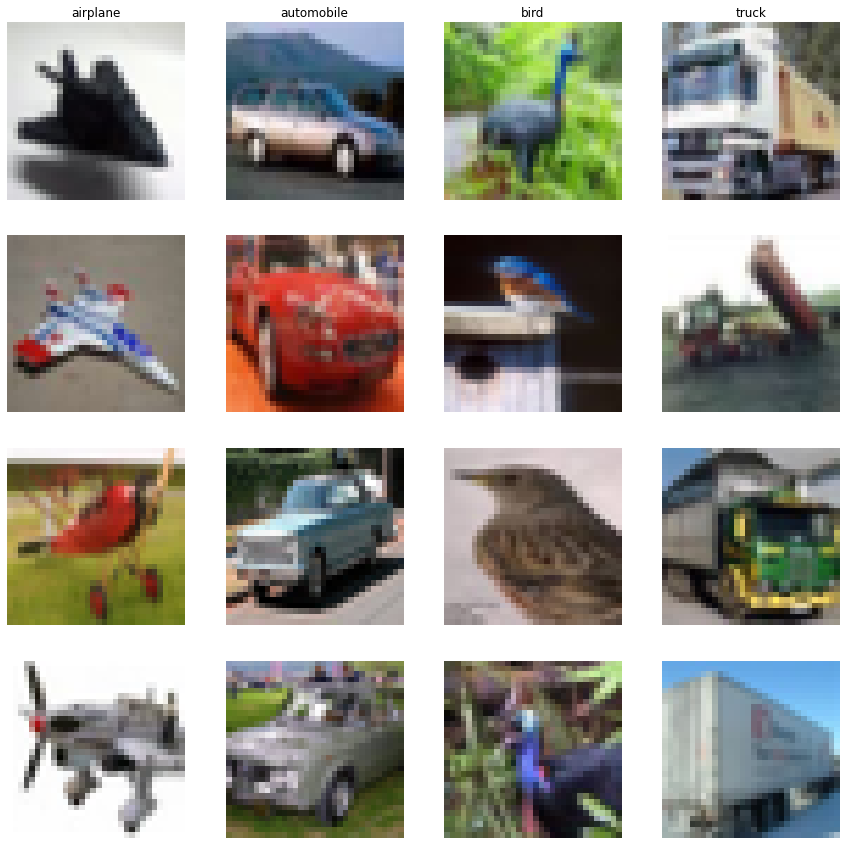

In [13]:
# Display 10 samples from each of the 10 classes in cifar-10 dataset
classes = ['airplane', 'automobile', 'bird', 'truck']
images_to_plot = None
for i in [0,1,2,3]:
    index = np.where(y_train==i)[0]
    if i == 0:
        images_to_plot = x_train[index[0:4],:,:]
    else:
        images_to_plot = np.vstack((images_to_plot, x_train[index[0:4],:,:]))
print(images_to_plot.shape)
images_to_plot = images_to_plot.reshape(4,4,32, 32, 3).transpose(1,0,2,3,4).reshape(16,32,32,3)
plot_colour_images(images_to_plot, nrows=4, ncols=4,thefigsize=(15,15), titles=classes, classes=len(classes))

In [14]:
# We start by creating a CNN model

# Convolutional layers with batch normalization and max pooling. Refer to Chollet's book for details on 
# pooling and also for padding and strides. For batch normalization refer to the paper in the references below.
def create_conv_model_old(input, count):
    model = models.Sequential(name='expert_'+str(count))
    filter_size = (3,3)
    filters = 8
    model.add(input)
    model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization()) 
    model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))

    filters = 32
    model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
    model.add(BatchNormalization()) 
    model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))

    filters = 64
    model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
    model.add(BatchNormalization()) 
    model.add(layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax',name='softmax'))
    return model

In [15]:
# We start by creating a CNN model

# Convolutional layers with batch normalization and max pooling. Refer to Chollet's book for details on 
# pooling and also for padding and strides. For batch normalization refer to the paper in the references below.
def create_conv_model(input, count):
    filter_size = (3,3)
    filters = 8
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu', input_shape=(32, 32, 3))(input)
    x = BatchNormalization()(x)
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)

    filters = 32
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)

    filters = 64
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = BatchNormalization()(x) 
    x = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(x)
    x = layers.MaxPool2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(4, activation='softmax',name='softmax'+str(count))(x)
    return x

In [ ]:
class selector_stochastic_old(Layer):
    def __init__(self,**kwargs):
        super(selector,self).__init__(**kwargs)

    def build(self,input_shape):
        super(selector, self).build(input_shape)
        
    def call(self,x):
        batch_size = 64 `
        x = tf.reshape(x,(batch_size, 5, 4))
        probs_list = []
        for i in range(batch_size):
            probs_list.append(x[i,4,:])
        probs = tf.stack(probs_list)
        output_list = []
        for i in range(batch_size):             
            dist = tfp.distributions.Multinomial(total_count=1, probs=probs[i,:])
            sample = dist.sample()
            index = tf.math.argmax(sample, output_type=tf.dtypes.int32)
            output_list.append(tf.concat([tf.reshape(x[i,index,:],(1,4)), tf.reshape(x[i,:,:],(5,4))], axis=0))
        output = tf.stack(output_list)
        output=tf.reshape(output,(64,6,4))      
        return output
        
    def compute_output_shape(self,input_shape):
        return (input_shape[0],6,input_shape[-1])

    def get_config(self):
        return super(selector,self).get_config()


In [ ]:
class selector_stochastic(Layer):
    def __init__(self,**kwargs):
        super(selector,self).__init__(**kwargs)

    def build(self,input_shape):
        super(selector, self).build(input_shape)
        
    def call(self,x):
        batch_size = 64 `
        x = tf.reshape(x,(batch_size, 5, 4))
        probs = x[:, 4,:]
        sample_list = []
        for i in range(batch_size):             
            dist = tfp.distributions.Multinomial(total_count=1, probs=probs[i,:])
            sample = dist.sample()
            sample_list.append(tf.reshape(sample, (4,1)))
        samples = tf.stack(sample_list)
        samples = tf.repeat(samples, repeats=[4], axis=2)
        output = tf.reduce_sum(tf.multiply(samples, x[:,0:4,:]), axis=1)
        output=tf.nn.softmax(output)      
        return output
        
    def compute_output_shape(self,input_shape):
        return (input_shape[0],6,input_shape[-1])

    def get_config(self):
        return super(selector,self).get_config()


In [16]:
class selector_expectation(Layer):
    def __init__(self,**kwargs):
        super(selector_expectation,self).__init__(**kwargs)

    def build(self,input_shape):
        super(selector_expectation, self).build(input_shape)
        
    def call(self,x):
        batch_size = 64
        x = tf.reshape(x,(batch_size, 5, 4))
        output = tf.reduce_sum(tf.multiply(tf.repeat(tf.reshape(x[:, 4,:], (64,4,1)), repeats=[4], axis=2),x[:,0:4,:]), axis=1)  
        #for i in range(64):
        #    tf.print(x[i,:,:],output[i])
        return output
        
    def compute_output_shape(self,input_shape):
        return (input_shape[0],1,input_shape[-1])

    def get_config(self):
        return super(selector_expectation,self).get_config()


In [17]:
input = layers.Input(shape=(32,32,3), name='myInput')

In [ ]:
#classification layers
model = create_conv_model(input)
model.summary()

In [ ]:
# Train the model
model.reset_states() 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train_one_hot[:train_size,:], epochs=15, batch_size=64, shuffle=True)
model.save('cifar-10-model-complete-train')

In [ ]:
# Using pre-trained model with complete cifar-10 50,000 training images 
model = load_model('cifar-10-model-complete-train')

In [18]:
experts = []
for i in range(4):
    experts.append(create_conv_model(input, i))

In [19]:
#Gate network
filters = 32
filter_size = (3,3)
#gate = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(input)
#gate = BatchNormalization()(gate)
#gate = layers.Conv2D(filters, filter_size, strides=1, padding='same',activation='relu')(gate)
#gate = layers.MaxPool2D((2, 2))(gate)
gate = layers.Flatten()(input)
gate = layers.Dense(768, activation='relu')(gate)
gate = layers.Dense(192, activation='relu')(gate)
gate = layers.Dense(64, activation='relu')(gate)
gate = layers.Dense(16, activation='relu')(gate)
gate = layers.Dense(32, activation='relu')(gate)
gate = layers.Dense(4, activation='softmax',name='softmax_gate')(gate)

In [ ]:
#Gate network
gate = models.Sequential(name='gate')
gate.add(input)
gate.add(layers.Flatten())
gate.add(layers.Dense(64, activation='relu'))
gate.add(layers.Dense(4, activation='softmax',name='softmax'))
#gate = create_conv_model(input)
gate.summary()

In [20]:
#x = tf.keras.layers.Concatenate(axis=0)(experts+[gate])
selector_output = selector_expectation()(experts+[gate])
selector_model = Model(input, selector_output,name='selector')
selector_model.summary()

Model: "selector"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
myInput (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 8)    224         myInput[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 8)    224         myInput[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 8)    224         myInput[0][0]                    
___________________________________________________________________________________________

In [ ]:
selector_input = []
for expert in experts:
    selector_input.append(expert(input))
selector_input.append(gate(input))
x = tf.keras.layers.Concatenate(axis=0)(selector_input)
selector_output = selector(trainable=False)(x)
selector_model = Model(input, [selector_output]+selector_input[0:4],name='selector')
#selector_model = Model(input, selector_output,name='selector')
selector_model.summary()

In [ ]:
class ExpectedAccuracy(tf.keras.metrics.CategoricalAccuracy):

    def __init__(self, name='expected_accuracy', **kwargs):
        super(ExpectedAccuracy, self).__init__(name=name, **kwargs)
 
    def update_state(self, y_true, y_pred, sample_weight=None):
        pred = []
        for i in range(64):
            pred.append(y_pred[i,0,:])
        pred = tf.stack(pred)
        
        super(ExpectedAccuracy, self).update_state(y_true, pred)

In [21]:
def gate_loss(actual, pred):   
    from tensorflow.keras.losses import categorical_crossentropy, mse
    #tf.print('ACTUAL AND PRED')
    #for i in range(64):
    #    tf.print(actual[i], pred[i])
    return mse(actual, pred)
    
#     total_error_list = []
#     for i in range(64):
#         error_list = []
#         for j in range(4):          
#             error_list.append(tf.multiply(probs[i,j], 
#                                           mse(actual[i,:],pred[j,i,:])))
#         error = tf.stack(error_list)
#         total_error_list.append(tf.reduce_sum(error))
#     total_error = tf.stack(total_error_list)
#     return total_error


In [21]:
selector_model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics="categorical_accuracy")
#gate.compile(optimizer='adam', loss="categorical_crossentropy", metrics="categorical_accuracy")
#for expert in experts:
#    expert.compile(optimizer='adam', loss="categorical_crossentropy", metrics="categorical_accuracy")

In [ ]:
losses = {"expert_0":"categorical_crossentropy",
          "expert_1":"categorical_crossentropy",
          "expert_2":"categorical_crossentropy",
          "expert_3":"categorical_crossentropy",
          "selector_7":gate_loss
}
metrics = {"expert_0":"categorical_accuracy",
          "expert_1":"categorical_accuracy",
          "expert_2":"categorical_accuracy",
          "expert_3":"categorical_accuracy",
          "selector_7":ExpectedAccuracy()
}
selector_model.compile(optimizer='adam', loss=losses, metrics=metrics)
#selector_model.compile(optimizer='adam', loss=gate_loss, metrics=ExpectedAccuracy())
gate.compile(optimizer='adam')
for expert in experts:
    expert.compile(optimizer='adam')

In [23]:
selector_model.fit(x_train, y_train_one_hot[:train_size,:], epochs=15, batch_size=64, shuffle=True)

Epoch 1/15
13/13 [==============================] - 4s 302ms/step - loss: 3.5325 - categorical_accuracy: 0.2608
Epoch 2/15
13/13 [==============================] - 4s 298ms/step - loss: 3.5325 - categorical_accuracy: 0.2500
Epoch 3/15
13/13 [==============================] - 4s 301ms/step - loss: 3.6295 - categorical_accuracy: 0.2548
Epoch 4/15
13/13 [==============================] - 4s 300ms/step - loss: 3.5908 - categorical_accuracy: 0.2560
Epoch 5/15
13/13 [==============================] - 4s 300ms/step - loss: 3.4361 - categorical_accuracy: 0.2608
Epoch 6/15
13/13 [==============================] - 4s 297ms/step - loss: 3.5520 - categorical_accuracy: 0.2548
Epoch 7/15
13/13 [==============================] - 4s 305ms/step - loss: 3.3498 - categorical_accuracy: 0.2692
Epoch 8/15
13/13 [==============================] - 4s 313ms/step - loss: 3.5835 - categorical_accuracy: 0.2272
Epoch 9/15
13/13 [==============================] - 4s 298ms/step - loss: 3.7121 - categorical_accuracy:

# Utility function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= tf.reduce_mean(x)
    x /= (tf.math.reduce_std(x) + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((0, 1, 2))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [ ]:
# Function to visualize the activate of given filter in the given layer
def visualize_activation(layer_name, filter_index):    
    input_img_data =  tf.convert_to_tensor((np.random.random((1, 32, 32, 3)) * 20 + 128.), dtype=tf.float32)
    step = 1
    
    for _ in range(150):
        #Track the inputs to the layers, output of each layer is the input to the next layer
        outputs = [input_img_data]
        
        with tf.GradientTape() as tape:
            # Watch inputs
            tape.watch(outputs)
            tape.watch(input_img_data)
            
            # Apply the input to each layer to get the outputs of each layer
            # until the layer specified
            for layer in model.layers:
                layer_output = layer(outputs[-1])
                if layer.name == layer_name:                  
                    if isinstance(layer, layers.Dense):
                        loss_value = K.mean(layer_output[:, filter_index])
                    else:  
                        loss_value = K.mean(layer_output[:, :, :, filter_index])
                    loss_value = K.mean(layer_output)
                    break
                outputs.append(layer(outputs[-1]))          

        grads = tape.gradient(loss_value, input_img_data)  
        
        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
        
        # some filters get stuck to 0, we can skip them
        if loss_value <= K.epsilon():
            return None, None
        # Add the gradients to the input image
        input_img_data += grads * step
    img = deprocess_image(input_img_data.numpy()[0])
    return img, loss_value

In [ ]:
# We will maximize activation of all the filters in the last convolutional layer, as they learn more complex patterns. 
# But you can use the same procedure to visualize any filter in any layer.

# Filters that get stuck in 0 are skipped

layer_name = 'conv2d_5'
output_layer = layer_dict[layer_name]

# Get the number of filters in layer_name
num_filters = len(output_layer.get_weights()[1])
print('Layer ', layer_name, ' has ', num_filters, ' filters')

# Visualize activations of all the filters in the current layer
processed_filters = []
for i in range(0, num_filters):
    img, loss_value = visualize_activation(layer_name, i)
    if not img is None: 
        print('Processed filter ', i)
        processed_filters.append((img, loss_value))
print('Number of filters with non-zero loss are ', len(processed_filters))



In [ ]:
model.layers

In [ ]:
# We can also visualize the dense layer output. Here we visualize the last dense layer of the model for the class bird
layer_name = 'dense_2'

# Index for class bird
class_index = 2
img, loss_value = visualize_activation(layer_name, class_index)
processed_dense_filters = [(img, loss_value)]



In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Function to create a stitched image of the individual images of the filters and save it to a file
def draw_filters(filters, model_name, output_dim=(32, 32), n=None):
    """Draw the best filters in a nxn grid.
    # Arguments
        filters: A List of generated images and their corresponding losses
                 for each processed filter.
        model_name: String specifying the name of the model
        n: dimension of the grid.
           If none, the largest possible square will be used
    """
    if n is None:
        n = int(np.floor(np.sqrt(len(filters))))

    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top n*n filters.
    filters.sort(key=lambda x: x[1], reverse=True)
    filters = filters[:n * n]

    # build a black picture with enough space for
    # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
    MARGIN = 5
    width = n * output_dim[0] + (n - 1) * MARGIN
    height = n * output_dim[1] + (n - 1) * MARGIN
    stitched_filters = np.zeros((width, height, 3), dtype='uint8')

    # fill the picture with our saved filters
    for i in range(n):
        for j in range(n):
            img, _ = filters[i * n + j]
            width_margin = (output_dim[0] + MARGIN) * i
            height_margin = (output_dim[1] + MARGIN) * j
            stitched_filters[
                width_margin: width_margin + output_dim[0],
                height_margin: height_margin + output_dim[1], :] = img

    print(stitched_filters.shape)

    # save the result to disk
    mpimg.imsave('{0:}_{1:}_{2:}x{2:}.png'.format(model_name, layer_name, n), stitched_filters)
    image_file_name ='{0:}_{1:}_{2:}x{2:}.png'.format(model_name, layer_name, n)
    return image_file_name

In [ ]:
# Visualize the processed filters of the last convolutional layer. Here we visualize the top few filters with the 
# maximum activations and save the visualization as an image on disk
model_name = 'cifar-10'
result = draw_filters(processed_filters,  model_name, (32, 32))
img=mpimg.imread(result)
plt.rcParams['figure.figsize'] = (25,25)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Visualize the output of the dense layer for the class bird processed above. 
model_name = 'cifar-10-dense'
result = draw_filters(processed_dense_filters,  model_name, (32, 32))
img=mpimg.imread(result)
plt.rcParams['figure.figsize'] = (3,3)
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# This function visualizes the top 10 activated filters of each of the convolutional layer when an image of one of the
# classes of cifar-10 dataset is predicted using the trained model. This visualization gives an idea of how each layer
# sees the image
def visualize_filters_for_class(class_name):
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Select a random image of the given class
    index = np.where(cy_test==classes.index(class_name))[0]
    sample = random.randint(0,len(index)-1)
    input_img = cx_test[index[sample],:,:]

    plt.rcParams['figure.figsize'] = (4,4)
    plt.imshow(input_img)

    input_img = input_img.reshape(1, 32, 32, 3).astype(float)

    #Predict the class of the selected image
    output_class = np.argmax(model.predict(input_img))

    # Get outputs of each layer
    layer_outs = []
    outputs = [tf.convert_to_tensor(input_img)]
    for layer in model.layers:
        layer_output = layer(outputs[-1])
        outputs.append(layer_output)
        layer_outs.append(layer_output)
        
    # Index corresponding to convolutional layers
    conv_layers = [0, 2, 4, 6, 8, 10]

    for layer in conv_layers:
        output_images = np.squeeze(layer_outs[layer], axis=0)
    
        filter_images = []
        num_filters = output_images.shape[2]
        for filter_index in range(0, num_filters):
            # Compute the activation of the filter
            loss_value = np.mean(output_images[:,:,filter_index])
            filter_images.append((output_images[:,:,filter_index], loss_value))

        # Sort filters in decreasing order of their activations
        filter_images.sort(key=lambda x: x[1], reverse=True)
        fig,ax = plt.subplots(1, 9, sharex=True, sharey=True, figsize=(18,18))
        ax = ax.flatten()
        i = 0
        # Visualize the top 10 most activated filters in the layer
        for img in filter_images[0:9]:
            image = img[0]
            #print(image.sum())

            ax[i].imshow(image) 
            ax[i].axis('off')    
            i += 1
    

In [ ]:
# Choose a class from the 10 classes 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
#'ship', 'truck' and visualize the activations of all the layers of the model when this image is predicted.
# The output shows the top 10 activated filters for each of the 6 convolutional layers of the model
visualize_filters_for_class('dog')

In [ ]:
input_shape = (2, 8, 8,3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x)
y = tf.keras.layers.Cropping2D(cropping=((2, 2), (2, 2)))(x)
print(y)
print(y.shape)